<a href="https://colab.research.google.com/github/phytometrics/plant_phenotyping_python/blob/main/notebooks/chronoroot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ChronoRoot　（未完）
訓練済みのモデルで根の解析を行うノートブック

## ライセンス
- ChronoRoot論文, Gaggion et al., 2021, GigaScience (https://academic.oup.com/gigascience/article/10/7/giab052/6324285)
    - CC-BY
- 公式レポジトリ (https://github.com/ngaggion/ChronoRoot)
    - GPLv3
- データセット (http://gigadb.org/dataset/100911)
    - GIGAdbの利用規約が定めるライセンス（http://gigadb.org/site/term; CC0相当）に準拠
- 本稿プログラムコード
    - **本章のコードは公式レポジトリのライセンスを継承してGPLv3となります。**

### メモ
python segmentFast.py imagePath --output_dir optionalSegPath --use_crf boolean --model ResUNetDS
- > 結果をchronorootで解析


## 環境構築

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp /content/drive/MyDrive/phenotyping_temp_assets/Test_ChronoRoot.zip ./
!unzip Test_ChronoRoot.zip  > /dev/null 2>&1

In [3]:
!cp /content/drive/MyDrive/phenotyping_temp_assets/chronoroot/cr_resunetds.onnx ./
!cp /content/drive/MyDrive/phenotyping_temp_assets/chronoroot/ChronoRootEnsemble.onnx ./

In [4]:
# 公式レポジトリのクローニング
!git clone https://github.com/ngaggion/ChronoRoot.git

# pydensecrfのインストール
!pip install git+https://github.com/lucasb-eyer/pydensecrf.git  > /dev/null 2>&1
!pip install onnx onnxruntime-gpu > /dev/null 2>&1
# モデルチェックポイントファイルのダウンロード
# !gdown 1OSqvRXKay-0bsmQqtlmYnu_sp6-_I-eC
# !unzip modelWeights.zip

# テストデータセットのダウンロード
# !wget -O Test_ChronoRoot.zip https://ftp.cngb.org/pub/gigadb/pub/10.5524/100001_101000/100911/LabeledDataset/Test_ChronoRoot.zip
# !unzip Test_ChronoRoot.zip

# 不要ファイルの削除
# !rm modelWeights.zip
# !rm Test_ChronoRoot.zip

Cloning into 'ChronoRoot'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 108 (delta 57), reused 88 (delta 39), pack-reused 0
Receiving objects: 100% (108/108), 925.53 KiB | 5.89 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [5]:
#https://colab.research.google.com/github/count0/colab-gt/blob/master/colab-gt.ipynb#scrollTo=kDn_lVxg3Z2G
!echo "deb http://downloads.skewed.de/apt jammy main" >> /etc/apt/sources.list
!apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard
!apt-get install libzbar0 &>/dev/null
!pip install pyzbar &>/dev/null

Executing: /tmp/apt-key-gpghome.tf6zEl9qVE/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [556 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://downloads.skewed.de/apt jammy InRelease [7,536 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://downloads.skewed.de/apt jammy/main amd64 Packages [2,989 B]
Get:10 http://archive.ubuntu

5
(2464, 3280, 3)
(2464, 3280, 3)
(2464, 3280, 3)
(2464, 3280, 3)
(2464, 3280, 3)


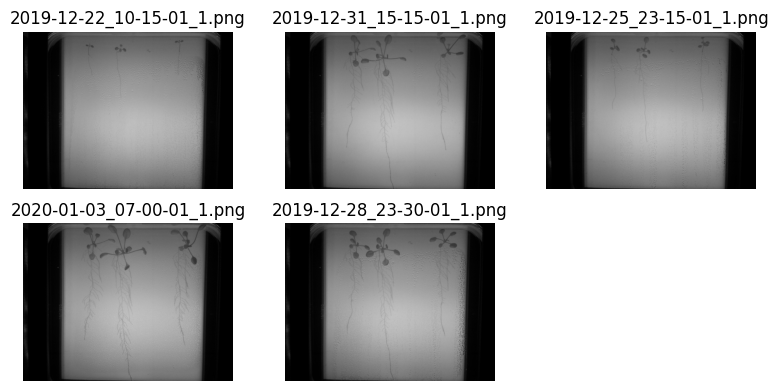

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

TEST_DIR = "/content/Test_ChronoRoot/rpi14_2019-12-09_16-13/1"

# nii.gzはアノテーションファイルであるため、png拡張子の画像のみフィルタリングする
files = [x for x in os.listdir(TEST_DIR) if x.endswith(".png")]
print(len(files))  # 5枚

plt.figure(figsize=(8,4))
for i, file in enumerate(files):
    path = os.path.join(TEST_DIR, file)
    image = cv2.imread(path)
    print(image.shape)
    image = cv2.resize(image, dsize=None, fx=0.25, fy=0.25)
    plt.subplot(2,3,i+1)
    plt.title(file)
    plt.imshow(image)
    plt.axis("off")

plt.tight_layout()

In [ ]:
# 作者らの公式レポジトリのREADMEに従い、colaboratoryでsegmentFastやsegmentEnsembleを実行すると
# tensorflowのバージョン齟齬によりエラーがおきます。独自の環境で実行したい方は公式推奨のdockerイメージを利用してください。

In [7]:
import onnxruntime as ort

In [ ]:
# classifier_path = "/content/ChronoRootEnsemble.onnx"
# providers = ['CUDAExecutionProvider', 'CPUExecutionProvider']
# ort_session = ort.InferenceSession(classifier_path, providers=providers)

# # inputとoutputの名前を把握します。
# input_names = [input.name for input in ort_session.get_inputs()]
# output_names = [output.name for output in ort_session.get_outputs()]

# print("Input names:", input_names)
# print("Output names:", output_names)

In [19]:
import pydensecrf.densecrf as dcrf

def post_process(prediction):
    accum = np.zeros(prediction.shape[1:3])
    image = cv2.cvtColor((prediction[0,:,:,0]*255).astype('uint8'), cv2.COLOR_GRAY2RGB)
    image = np.ascontiguousarray(image)

    label_1 = np.transpose(prediction[0,:,:,:], (2,0,1))
    unary = -np.log(np.clip(label_1,1e-5,1.0))
    c, h, w = unary.shape
    unary = unary.transpose(0, 2, 1)
    unary = unary.reshape(2, -1)
    unary = np.ascontiguousarray(unary)

    denseCRF = dcrf.DenseCRF2D(w, h, 2)
    denseCRF.setUnaryEnergy(unary)
    denseCRF.addPairwiseBilateral(sxy=5, srgb=3, rgbim=image, compat=1)

    q = denseCRF.inference(1)
    crf_map = np.array(q).reshape(2, w, h).transpose(2, 1, 0)

    accum = 0.8 * accum + crf_map[:,:,1]
    return accum

def pad_image_to_multiple_of(v, multipleOf=[8, 8], mode='symmetric'):
    padding = ((0, 0 if v.shape[0] % multipleOf[0] == 0 else multipleOf[0] - (v.shape[0] % multipleOf[0])),
               (0, 0 if v.shape[1] % multipleOf[1] == 0 else multipleOf[1] - (v.shape[1] % multipleOf[1])))
    return np.pad(v, padding, mode)

def preprocess(image):
    # assure dtype is float32
    image = image.astype(np.float32)/255.
    # 画像サイズが32の倍数になるようにpaddingします。
    image = pad_image_to_multiple_of(image, [32,32])
    image = image[np.newaxis, ..., np.newaxis]
    return image


In [9]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import gc
import onnxruntime as ort

In [10]:
import time

In [11]:
import tempfile

In [18]:
!rm -r temp

In [25]:
def single_crf(image, mask):
    image *= 255.
    image = image.astype(np.uint8)
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    image = np.ascontiguousarray(image)

    label_1 = np.transpose(mask[0,:,:,:], (2,0,1))
    unary = -np.log(np.clip(label_1,1e-5,1.0))
    c, h, w = unary.shape
    unary = unary.transpose(0, 2, 1)
    unary = unary.reshape(2, -1)
    unary = np.ascontiguousarray(unary)

    denseCRF = dcrf.DenseCRF2D(w, h, 2)
    denseCRF.setUnaryEnergy(unary)
    denseCRF.addPairwiseBilateral(sxy=5, srgb=3, rgbim=image, compat=1)

    q = denseCRF.inference(1)
    crf_map = np.array(q).reshape(2, w, h).transpose(2, 1, 0)
    outimg = crf_map[:,:,1]
    return outimg

TEST_DIR = "/content/Test_ChronoRoot/rpi14_2019-12-09_16-13/1"
files = sorted([x for x in os.listdir(TEST_DIR) if x.endswith(".png")])
!mkdir masks
# SegNetはGPUメモリが足りないため使用しない。
!mkdir temp
temp_dir = "temp"
# with tempfile.TemporaryDirectory() as temp_dir:
for model in ["DeepLab", "UNet", "ResUNet","ResUNetDS"]:
    print(model)
    classifier_path = os.path.join("/content/drive/MyDrive/phenotyping_temp_assets/chronoroot/",model+".onnx")
    providers = ['CUDAExecutionProvider']
    ort_session = ort.InferenceSession(classifier_path, providers=providers)
    input_names = [input.name for input in ort_session.get_inputs()]
    output_names = [output.name for output in ort_session.get_outputs()]

    # メモリ不足に備え、一時ファイルに保存し、メモリを開放してからaggregateする
    for file in files:
        print(file)
        path = os.path.join(TEST_DIR, file)
        orig_image = cv2.imread(path, 0 )
        image = orig_image.copy()
        # image = preprocess(image)
        image = image.astype(np.float32)/255.
        # 画像サイズが32の倍数になるようにpaddingします。
        image = pad_image_to_multiple_of(image, [32,32])
        inputs = image[np.newaxis, ..., np.newaxis]

        predictions = ort_session.run(output_names, {input_names[0]: inputs})[0]
        output = single_crf(image, predictions)
        # np.save(os.path.join(temp_dir, model+file+".npy"), output)
        cv2.imwrite(os.path.join(temp_dir,model+file), output*255)
    # メモリ解放
    del ort_session
    gc.collect()

mkdir: cannot create directory ‘masks’: File exists
mkdir: cannot create directory ‘temp’: File exists
DeepLab
2019-12-22_10-15-01_1.png
2019-12-25_23-15-01_1.png
2019-12-28_23-30-01_1.png
2019-12-31_15-15-01_1.png
2020-01-03_07-00-01_1.png
UNet
2019-12-22_10-15-01_1.png
2019-12-25_23-15-01_1.png
2019-12-28_23-30-01_1.png
2019-12-31_15-15-01_1.png
2020-01-03_07-00-01_1.png
ResUNet
2019-12-22_10-15-01_1.png
2019-12-25_23-15-01_1.png
2019-12-28_23-30-01_1.png
2019-12-31_15-15-01_1.png
2020-01-03_07-00-01_1.png
ResUNetDS
2019-12-22_10-15-01_1.png
2019-12-25_23-15-01_1.png
2019-12-28_23-30-01_1.png
2019-12-31_15-15-01_1.png
2020-01-03_07-00-01_1.png


['DeepLab2019-12-22_10-15-01_1.png', 'ResUNet2019-12-22_10-15-01_1.png', 'ResUNetDS2019-12-22_10-15-01_1.png', 'UNet2019-12-22_10-15-01_1.png']


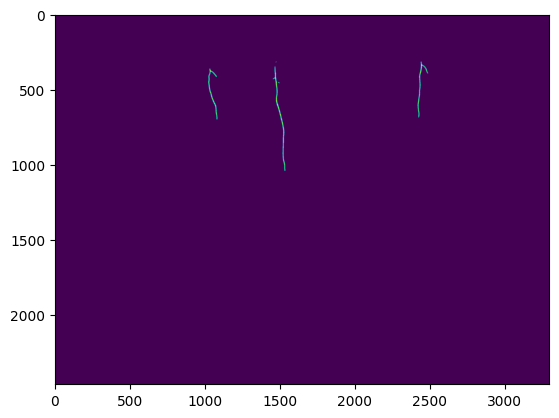

['ResUNetDS2019-12-25_23-15-01_1.png', 'UNet2019-12-25_23-15-01_1.png', 'ResUNet2019-12-25_23-15-01_1.png', 'DeepLab2019-12-25_23-15-01_1.png']


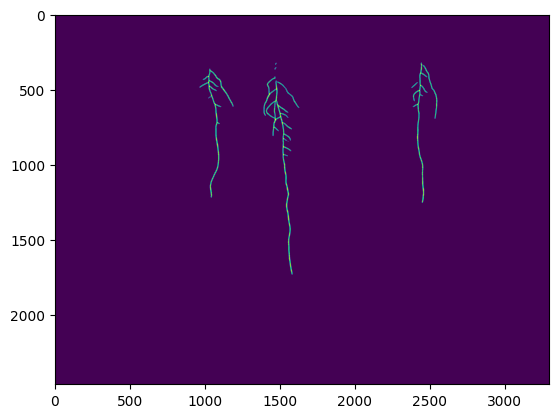

['ResUNetDS2019-12-28_23-30-01_1.png', 'ResUNet2019-12-28_23-30-01_1.png', 'DeepLab2019-12-28_23-30-01_1.png', 'UNet2019-12-28_23-30-01_1.png']


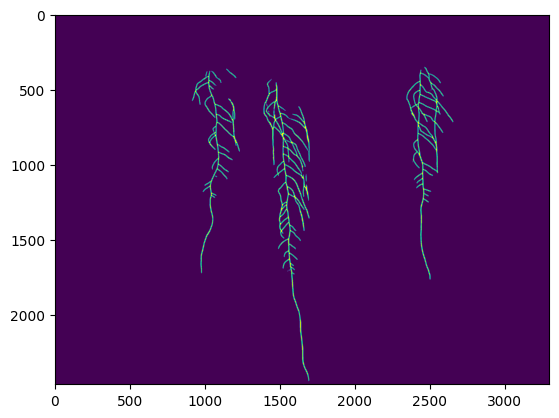

['UNet2019-12-31_15-15-01_1.png', 'DeepLab2019-12-31_15-15-01_1.png', 'ResUNet2019-12-31_15-15-01_1.png', 'ResUNetDS2019-12-31_15-15-01_1.png']


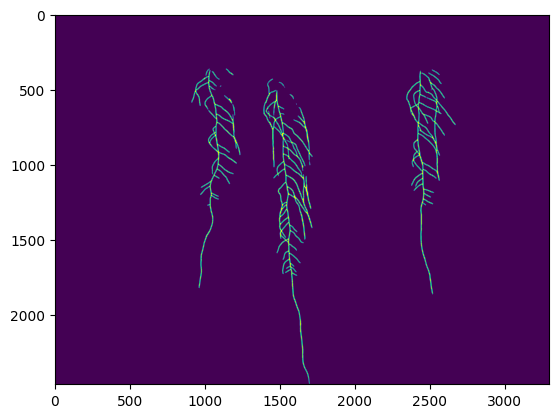

['DeepLab2020-01-03_07-00-01_1.png', 'ResUNetDS2020-01-03_07-00-01_1.png', 'UNet2020-01-03_07-00-01_1.png', 'ResUNet2020-01-03_07-00-01_1.png']


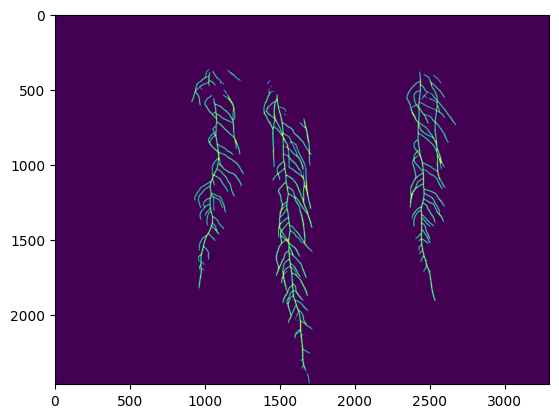

In [37]:
# アンサンブル結果統合
for file in files:
    target_files = [x for x in os.listdir(temp_dir) if x.endswith(file)]
    masks = []
    print(target_files)
    for target_file in target_files:
        mask = cv2.imread(os.path.join(temp_dir, target_file), 0) /255.
        masks.append(mask)

    ensemble = np.zeros_like(masks[0])
    for mask in masks:
        ensemble += mask
    ensemble /= len(masks)
    _, ensemble = cv2.threshold(ensemble, 0.5, 1.0, cv2.THRESH_BINARY)
    plt.imshow(ensemble)
    plt.show()

In [ ]:
# Define your new values
conf = "/content/ChronoRoot/config.conf"
backup = "/content/ChronoRoot/_config.conf"

!cp {conf} {backup}

# Read in the file
with open(conf, 'r') as file :
  filedata = file.read()
# Replace the target string
TEST_DIR = "/content/Test_ChronoRoot/rpi14_2019-12-09_16-13/1"
filedata = filedata.replace('Path = "/media/ngaggion/Datasets/rpi6/1"','Path = "{}"'.format(TEST_DIR))
filedata = filedata.replace("SegPath = os.path.join(Path, 'SegEnsemble')","SegPath = '/content/mask'")
filedata = filedata.replace('Project = "/media/ngaggion/Experiment1"','Project = "/content/result"')

# Write the file out again
with open(conf, 'w') as file:
  file.write(filedata)

In [ ]:
# chronorootanalyzerの中のgetroiandseedの中のselectROIがcv2.selectroiでgui window依存。最初から切り抜いてここを迂回するスクリプトを組む必要あり。

import os
import csv
import cv2
import numpy as np
import json

from ChronoRoot.graph.fileFunc import createResultFolder, loadPath  #, getROIandSeed
from ChronoRoot.graph.imageFunc import getCleanSeg, getCleanSke, savePlotImages, saveEmpty
from ChronoRoot.graph.graphFunc import createGraph, saveGraph, saveProps
from ChronoRoot.graph.trackFunc import graphInit, matchGraphs
from ChronoRoot.graph.rsmlFunc import createTree
from ChronoRoot.graph.graphPostProcess import trimGraph
from ChronoRoot.graph.dataWork import dataWork

[[844, 300, 1294, 1882], [1348, 360, 1836, 2464], [2270, 366, 2728, 1966]]


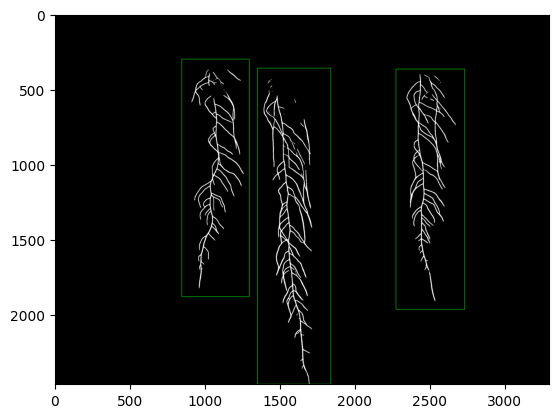

In [ ]:
mask_dir = "/content/mask"
# 日付が最も新しい写真を選ぶ
newest_file = sorted(os.listdir(mask_dir))[-1]

image = cv2.imread("/content/mask/2020-01-03_07-00-01_1.png")

# 今回は手動でbboxを設定する
bboxes = [
    [844,300,844+450,300+1582],
    [1348,360,1348+488,360+2104],
    [2270,366,2270+458,366+1600]
    ]
print(bboxes)
for bbox in bboxes:
    image = cv2.rectangle(image, (bbox[0],bbox[1]), (bbox[2],bbox[3]), (0,255,0), 2)
plt.imshow(image)

In [ ]:
def ColabChronoRootAnalyzer(image_dir, mask_dir, bboxes):

    images = [file for file in sorted(os.listdir(image_dir)) if file.endswith("png")]
    masks = [file for file in sorted(os.listdir(mask_dir)) if file.endswith("png")]

    # metadata = {}
    # metadata['bounding box'] = bboxes
    # metadata['seed'] = seed
    # metadata['folder'] = conf['Path']
    # metadata['segFolder'] = conf['SegPath']
    # metadata['info'] = conf['fileKey']

    # print(metadata)

    # iterate through bboxes
    for bbox in bboxes:
        for mask in masks:



    return
    # metapath = os.path.join(saveFolder, 'metadata.json')

    with open(metapath, 'w') as fp:
        json.dump(metadata, fp)

    start = 0
    N = len(images)
    pfile = os.path.join(saveFolder, "Results.csv") # For CSV Saver

    with open(pfile, 'w+') as csv_file:
        csv_writer = csv.writer(csv_file)
        row0 = ['FileName', 'TimeStep','MainRootLength','LateralRootsLength','NumberOfLateralRoots','TotalLength']
        csv_writer.writerow(row0)

        ### First, it begins by obtaining the first segmentation

        for i in range(0, N):
            print('TimeStep', i+1, 'of', N)
            segFile = segFiles[i]
            seg, segFound = getCleanSeg(segFile, bbox, originalSeed, originalSeed)

            original = cv2.imread(images[i])[bbox[0]:bbox[1],bbox[2]:bbox[3]]

            if segFound:
                ske, bnodes, enodes, flag = getCleanSke(seg)
                if flag:
                    start = i
                    break

            image_name = getImgName(images[i], conf)
            saveProps(image_name, i, False, csv_writer, 0)
            saveEmpty(image_name, imagePath, original, seg)

        print('Growth Begin')

        grafo, seed, ske2 = createGraph(ske.copy(), seed, enodes, bnodes)
        grafo, ske, ske2 = trimGraph(grafo, ske, ske2)
        grafo = graphInit(grafo)

        image_name = getImgName(images[i], conf)

        gPath = os.path.join(graphsPath, image_name.replace(conf['FileExt'],'.xml.gz'))
        saveGraph(grafo, gPath)

        rsmlTree, numberLR = createTree(conf, i, images, grafo, ske, ske2)

        rsml = os.path.join(rsmlPath, image_name.replace(conf['FileExt'],'.rsml'))
        rsmlTree.write(open(rsml, 'w'), encoding='unicode')

        saveProps(image_name, i, grafo, csv_writer, numberLR)

        original = cv2.imread(images[i])[bbox[0]:bbox[1],bbox[2]:bbox[3]]
        savePlotImages(image_name, imagePath, original, seg, grafo, ske2)

        segErrorFlag = False #Previous time-step error
        trackCount = 0

        for i in range(start+1, N):
            print('TimeStep', i+1, 'of', N)
            errorFlag_ = False

            segFile = segFiles[i]
            seg, flag1 = getCleanSeg(segFile, bbox, seed.tolist(), originalSeed)

            if flag1:
                ske, bnodes, enodes, flag2 = getCleanSke(seg)
                if not flag2:
                    print("Error in the skeleton")
                    errorFlag_ = True
            else:
                print("Error in the segmentation")
                errorFlag_ = True

            trackError = False

            if not errorFlag_:
                grafo2, seed, ske2_ = createGraph(ske.copy(), seed, enodes, bnodes)
                grafo2, ske_, ske2_ = trimGraph(grafo2, ske.copy(), ske2_)

                if not segErrorFlag:
                    try:
                        grafo = matchGraphs(grafo, grafo2)
                        ske =  ske_.copy()
                        ske2 = ske2_.copy()
                    except:
                        print("Error on node tracking")
                        trackError = True
                else:
                    grafo = graphInit(grafo2)
                    ske =  ske_.copy()
                    ske2 = ske2_.copy()

            else:
                image_name = getImgName(images[i], conf)
                saveProps(image_name, i, False, csv_writer, 0)
                saveEmpty(image_name, imagePath, original, seg)

            segErrorFlag = errorFlag_

            if not segErrorFlag and not trackError:
                gPath = os.path.join(graphsPath, image_name.replace(conf['FileExt'],'.xml.gz'))
                saveGraph(grafo, gPath)

                seedrsml = None
                v = grafo[0].get_vertices()
                for k in v:
                    if grafo[4][k] == "Ini":
                        seedrsml = grafo[1][k]
                        seedrsml = np.array(seed, dtype='int')

                if seedrsml is None:
                    trackError = True
                    image_name = images[i].replace(conf['Path'],'').replace('/','')
                    saveProps(image_name, i, False, csv_writer, 0)
                    saveEmpty(image_name, imagePath, original, seg)
                else:
                    rsmlTree, numberLR = createTree(conf, i, images, grafo, ske, ske2)
                    rsml = os.path.join(rsmlPath, image_name.replace(conf['FileExt'],'.rsml'))
                    rsmlTree.write(open(rsml, 'w'), encoding='unicode')

                    image_name = getImgName(images[i], conf)
                    saveProps(image_name, i, grafo, csv_writer, numberLR)

                    original = cv2.imread(images[i])[bbox[0]:bbox[1],bbox[2]:bbox[3]]
                    savePlotImages(image_name, imagePath, original, seg, grafo, ske2)

            if trackError and trackCount > 5:
                print('Analysis ended early at timestep', i, 'of', N)
                break
            elif trackError:
                trackCount += 1
            else:
                trackCount = 0

    dataWork(conf, pfile, saveFolder)

image_dir = "/content/Test_ChronoRoot/rpi14_2019-12-09_16-13/1"
mask_dir = "/content/mask"
ColabChronoRootAnalyzer(image_dir=image_dir, mask_dir=mask_dir, bboxes=bboxes)


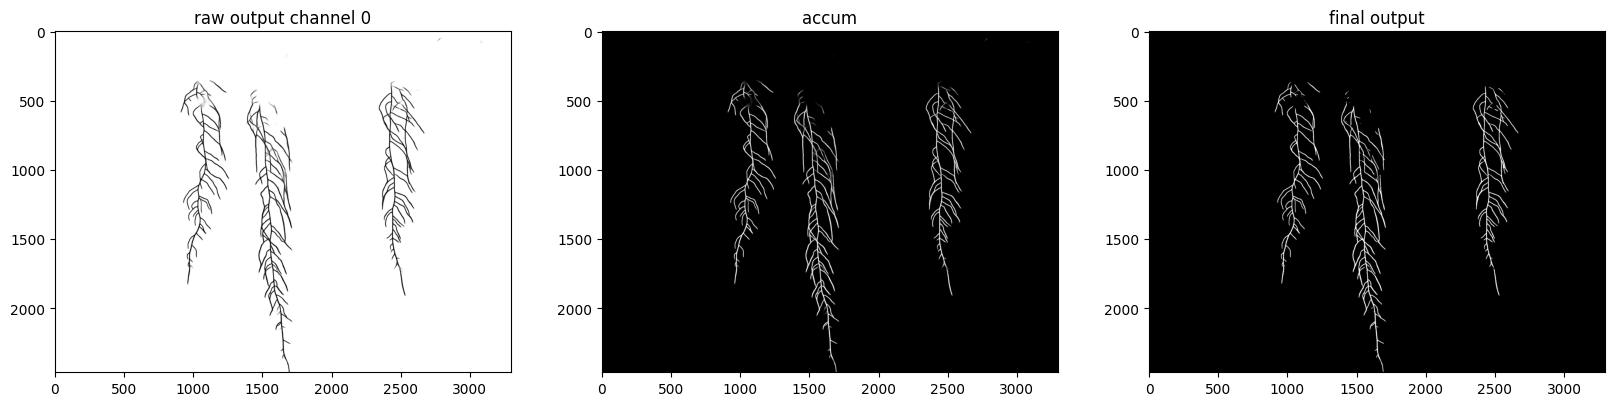

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.title("raw output channel 0")
plt.imshow(prediction[0,...,0], cmap="gray")

plt.subplot(1,3,2)
plt.title("accum")
plt.imshow(accum, cmap="gray")

plt.subplot(1,3,3)
plt.title("final output")
plt.imshow(outimg, cmap="gray")

True

In [ ]:
https://github.com/ngaggion/ChronoRoot/blob/master/segmentFast.py

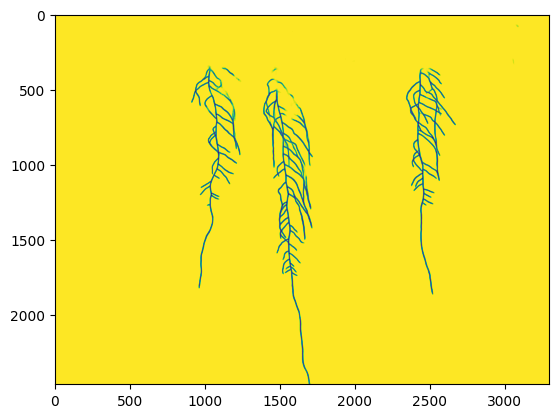

In [ ]:
plt.imshow(prediction[0,...,0])

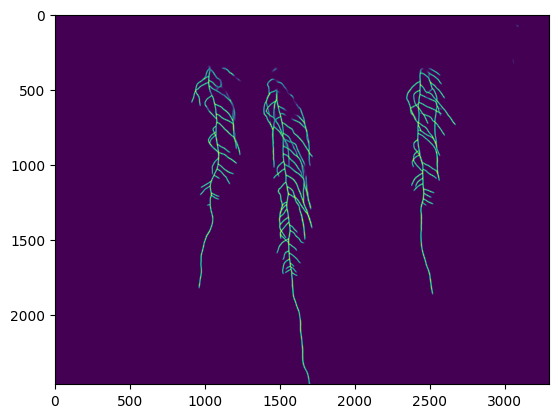

In [ ]:
plt.imshow(prediction[0,...,1])

In [ ]:
# post process with crf


1